# Labelling

In this study I'll use a bitcoin volume bars dataset dating from 04.2024 to 09.2025

In [19]:
import pandas as pd
df = pd.read_csv('./dataset/btc-04_2024-09-2025-volume-15min/btc-04_2024-09-2025-volume-15min.csv')

In [20]:
df.shape

(49366, 10)

In [21]:
df.head()

,date_time,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
0,2024-04-01 00:07:18.265000+00:00,12816,71280.00,71288.23,71107.71,71165.94,290.15586,132.92566,12816,2.065562e+07
1,2024-04-01 00:27:16.255000+00:00,31569,71165.95,71194.00,71102.00,71115.24,290.03716,136.65828,18753,2.063668e+07
2,2024-04-01 00:44:10.534000+00:00,48812,71115.24,71117.82,70844.14,70930.59,290.01188,117.39977,17243,2.059326e+07
3,2024-04-01 01:02:51.585000+00:00,66285,70930.59,71172.08,70880.00,71128.99,290.58347,190.18459,17473,2.063965e+07
4,2024-04-01 01:26:14.049000+00:00,83898,71128.95,71132.22,70952.90,71036.00,290.18545,134.62185,17613,2.061307e+07


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49366 entries, 0 to 49365
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_time         49366 non-null  object 
 1   tick_num          49366 non-null  int64  
 2   open              49366 non-null  float64
 3   high              49366 non-null  float64
 4   low               49366 non-null  float64
 5   close             49366 non-null  float64
 6   volume            49366 non-null  float64
 7   cum_buy_volume    49366 non-null  float64
 8   cum_ticks         49366 non-null  int64  
 9   cum_dollar_value  49366 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 3.8+ MB


In [23]:
# df['date_time'] = pd.to_datetime(df['date_time'])
df['date_time'] = pd.to_datetime(df['date_time'], format='mixed', utc=True)
df = df.set_index('date_time')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49366 entries, 2024-04-01 00:07:18.265000+00:00 to 2025-09-30 23:12:57.728052+00:00
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tick_num          49366 non-null  int64  
 1   open              49366 non-null  float64
 2   high              49366 non-null  float64
 3   low               49366 non-null  float64
 4   close             49366 non-null  float64
 5   volume            49366 non-null  float64
 6   cum_buy_volume    49366 non-null  float64
 7   cum_ticks         49366 non-null  int64  
 8   cum_dollar_value  49366 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 3.8 MB


In [24]:
df.head()

,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
date_time,,,,,,,,,
2024-04-01 00:07:18.265000+00:00,12816,71280.00,71288.23,71107.71,71165.94,290.15586,132.92566,12816,2.065562e+07
2024-04-01 00:27:16.255000+00:00,31569,71165.95,71194.00,71102.00,71115.24,290.03716,136.65828,18753,2.063668e+07
2024-04-01 00:44:10.534000+00:00,48812,71115.24,71117.82,70844.14,70930.59,290.01188,117.39977,17243,2.059326e+07
2024-04-01 01:02:51.585000+00:00,66285,70930.59,71172.08,70880.00,71128.99,290.58347,190.18459,17473,2.063965e+07
2024-04-01 01:26:14.049000+00:00,83898,71128.95,71132.22,70952.90,71036.00,290.18545,134.62185,17613,2.061307e+07


## Aplly symmetric CUSUM filter where the threshold is the standard deviation of daily returns

In [25]:
import numpy as np
daily = df['close'].resample('1D').last().to_frame()
daily['returns'] = np.log(daily['close'] / daily['close'].shift(1))
daily.dropna(inplace=True)

In [26]:
daily.head()

,close,returns
date_time,,
2024-04-02 00:00:00+00:00,65419.67,-0.064553
2024-04-03 00:00:00+00:00,66110.65,0.010507
2024-04-04 00:00:00+00:00,68492.06,0.035388
2024-04-05 00:00:00+00:00,67950.00,-0.007946
2024-04-06 00:00:00+00:00,68937.81,0.014433


In [27]:
std_daily_ret = daily['returns'].std()
std_daily_ret

0.02403298806976558

In [28]:
from mlfinpy.filters import cusum_filter
cusum_events = cusum_filter(df['close'], threshold = std_daily_ret)

In [29]:
len(cusum_events)

936

## Adding the vertical barriers

In [30]:
from mlfinpy.labeling.labeling import add_vertical_barrier

verticle_barriers = add_vertical_barrier(cusum_events, df['close'],num_days=1)

In [31]:
verticle_barriers.head()

2024-04-01 05:50:38.973000+00:00   2024-04-02 05:52:03.228000+00:00
2024-04-01 15:13:25.601000+00:00   2024-04-02 15:15:35.136000+00:00
2024-04-01 19:59:00.177000+00:00   2024-04-02 19:59:22.288000+00:00
2024-04-02 02:35:54.635000+00:00   2024-04-03 02:45:02.574000+00:00
2024-04-02 02:39:25.821000+00:00   2024-04-03 02:45:02.574000+00:00
Name: date_time, dtype: datetime64[ns, UTC]

## Adding the triple barrier events

target = daily volatility
pt_sl = [1,1]

tp, sl = target * pt_sl

In [32]:
from mlfinpy.labeling.labeling import get_events, drop_labels
from mlfinpy.util import get_daily_vol
from mlfinpy.labeling import get_events

pt_sl = [1, 1]
min_ret = 0.005
daily_vol = get_daily_vol(close=df['close'], lookback=50)
triple_barrier_events = get_events(close=df['close'],
                                               t_events=cusum_events,
                                               pt_sl=pt_sl,
                                               target=daily_vol,
                                               min_ret=min_ret,
                                               num_threads=3,
                                               vertical_barrier_times=verticle_barriers,
                                               side_prediction=None)

2025-10-19 13:35:50.641496 100.0% triple_barriers done after 0.03 minutes. Remaining 0.0 minutes..


In [33]:
triple_barrier_events

,t1,trgt,pt,sl
2024-04-02 02:35:54.635000+00:00,2024-04-02 02:37:30.886000+00:00,0.005652,1,1
2024-04-02 02:39:25.821000+00:00,2024-04-02 02:46:52.545000+00:00,0.014306,1,1
2024-04-02 10:49:02.566000+00:00,2024-04-02 10:59:50.351000+00:00,0.006218,1,1
2024-04-03 00:38:07.273000+00:00,2024-04-03 00:42:14.048000+00:00,0.007535,1,1
2024-04-03 03:54:03.241000+00:00,2024-04-04 04:02:33.254000+00:00,0.018460,1,1
...,...,...,...,...
2025-09-22 06:02:47.373774+00:00,2025-09-22 14:32:02.784811+00:00,0.009174,1,1
2025-09-25 12:30:00.083393+00:00,2025-09-25 17:20:34.660156+00:00,0.008702,1,1
2025-09-25 17:57:14.617501+00:00,2025-09-26 18:21:19.971717+00:00,0.014452,1,1
2025-09-28 22:10:24.601186+00:00,2025-09-29 13:43:12.088604+00:00,0.011553,1,1


## Calculate meta labels
$
\text{bin}_{t_0} =
\begin{cases}
+1, & \text{if the price hits the upper barrier (Take Profit)} \\
-1, & \text{if the price hits the lower barrier (Stop Loss)} \\
0,  & \text{if the time limit expires without touching any barrier}
\end{cases}
$

In [34]:
from mlfinpy.labeling import get_bins
meta_labels = get_bins(triple_barrier_events, df['close'])
meta_labels.head()

,ret,trgt,bin
2024-04-02 02:35:54.635000+00:00,-0.007636,0.005652,-1
2024-04-02 02:39:25.821000+00:00,0.015634,0.014306,1
2024-04-02 10:49:02.566000+00:00,0.006972,0.006218,1
2024-04-03 00:38:07.273000+00:00,0.009347,0.007535,1
2024-04-03 03:54:03.241000+00:00,-0.008757,0.018460,0


## Dropping the rare labels

In [35]:
clean_meta_labels = drop_labels(meta_labels, min_pct=0.1)

dropped label:  0 0.07327586206896551


In [36]:
meta_labels.bin.value_counts()

bin
 1    433
-1    427
 0     68
Name: count, dtype: int64

In [37]:
clean_meta_labels.bin.value_counts()

bin
 1    433
-1    427
Name: count, dtype: int64

In [38]:
clean_meta_labels

,ret,trgt,bin
2024-04-02 02:35:54.635000+00:00,-0.007636,0.005652,-1
2024-04-02 02:39:25.821000+00:00,0.015634,0.014306,1
2024-04-02 10:49:02.566000+00:00,0.006972,0.006218,1
2024-04-03 00:38:07.273000+00:00,0.009347,0.007535,1
2024-04-04 04:20:45.632000+00:00,0.010987,0.009090,1
...,...,...,...
2025-09-22 00:34:51.399126+00:00,-0.009036,0.006969,-1
2025-09-22 06:02:47.373774+00:00,0.009417,0.009174,1
2025-09-25 12:30:00.083393+00:00,-0.009687,0.008702,-1
2025-09-28 22:10:24.601186+00:00,0.012835,0.011553,1


In [39]:
first_model_data = pd.concat([df,clean_meta_labels],axis=1).dropna()

In [40]:
first_model_data = first_model_data.sort_index()
# first_model_data = first_model_data.drop(['ret'],axis=1)
# first_model_data = first_model_data.drop(['trgt'],axis=1)
first_model_data.head()

,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value,ret,trgt,bin
2024-04-02 02:35:54.635000+00:00,2086897,68249.04,68316.00,68100.00,68100.00,290.50537,101.38691,9707,1.980469e+07,-0.007636,0.005652,-1.0
2024-04-02 02:39:25.821000+00:00,2177921,66559.95,66600.15,66000.00,66000.00,290.09952,64.62116,12788,1.921086e+07,0.015634,0.014306,1.0
2024-04-02 10:49:02.566000+00:00,3114364,65700.00,65737.59,65454.55,65527.14,290.15652,73.07064,8564,1.902317e+07,0.006972,0.006218,1.0
2024-04-03 00:38:07.273000+00:00,4636798,64716.01,64716.01,64493.07,64584.36,290.25962,106.74046,9161,1.874571e+07,0.009347,0.007535,1.0
2024-04-04 04:20:45.632000+00:00,7003762,65520.00,65520.00,65212.77,65214.95,290.59311,76.01650,11486,1.897552e+07,0.010987,0.009090,1.0


In [41]:
split_idx = int(len(first_model_data) * 0.8)

In [42]:
first_model_data = first_model_data.sort_index()

split_idx = int(len(first_model_data) * 0.8)

train = first_model_data.iloc[:split_idx].copy()
test  = first_model_data.iloc[split_idx:].copy()

print(f"Train interval: {train.index.min()} → {train.index.max()}")
print(f"Test  interval: {test.index.min()}  → {test.index.max()}")

Train interval: 2024-04-02 02:35:54.635000+00:00 → 2025-03-13 01:51:07.546128+00:00
Test  interval: 2025-03-13 13:54:00.265893+00:00  → 2025-09-29 19:51:12.463610+00:00


In [43]:
features = [
    'open', 'high', 'low', 'close', 'volume',
    'cum_buy_volume', 'cum_ticks', 'cum_dollar_value', 'trgt',
]

X_train, y_train = train[features], train['bin']
X_test, y_test = test[features], test['bin']

## Training the first random forest classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    class_weight='balanced',  
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# evaluare
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))

[[61 28]
 [42 41]]
              precision    recall  f1-score   support

        -1.0      0.592     0.685     0.635        89
         1.0      0.594     0.494     0.539        83

    accuracy                          0.593       172
   macro avg      0.593     0.590     0.587       172
weighted avg      0.593     0.593     0.589       172



In [45]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

AUC Score: 0.588


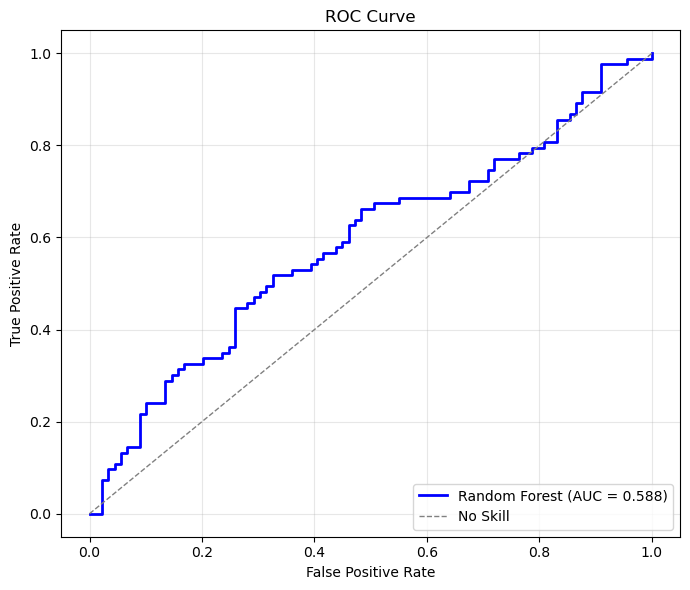

In [46]:
y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.3f}")

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Adding new features

In [47]:
first_model_data['ret_1'] = first_model_data['close'].pct_change(1)
first_model_data['ret_5'] = first_model_data['close'].pct_change(5)

first_model_data['ma_fast'] = first_model_data['close'].rolling(10).mean()
first_model_data['ma_slow'] = first_model_data['close'].rolling(50).mean()
first_model_data['ma_ratio'] = first_model_data['ma_fast'] / first_model_data['ma_slow'] - 1

first_model_data['vol_chg'] = first_model_data['volume'].pct_change(1)
first_model_data['hl_spread'] = (first_model_data['high'] - first_model_data['low']) / first_model_data['close']



ema_12 = first_model_data['close'].ewm(span=12, adjust=False).mean()
ema_26 = first_model_data['close'].ewm(span=26, adjust=False).mean()
first_model_data['macd'] = ema_12 - ema_26
first_model_data['macd_signal'] = first_model_data['macd'].ewm(span=9, adjust=False).mean()
first_model_data['macd_hist'] = first_model_data['macd'] - first_model_data['macd_signal']

delta = first_model_data['close'].diff()
gain = delta.clip(lower=0)
loss = (-delta).clip(lower=0)
avg_gain = gain.rolling(14, min_periods=14).mean()
avg_loss = loss.rolling(14, min_periods=14).mean()
rs = avg_gain / avg_loss.replace(0, np.nan)
first_model_data['rsi'] = 100 - (100 / (1 + rs))


first_model_data['trend_strength'] = (first_model_data['ma_fast'] - first_model_data['ma_slow']) / first_model_data['ma_slow']
first_model_data['price_above_ma'] = (first_model_data['close'] > first_model_data['ma_slow']).astype(int)

first_model_data = first_model_data.dropna()


split_idx = int(len(first_model_data) * 0.8)
train = first_model_data.iloc[:split_idx]
test  = first_model_data.iloc[split_idx:]

features = [
    'open','high','low','close','volume',
    'cum_buy_volume','cum_ticks','cum_dollar_value',
    'ret_1','ret_5','ma_ratio','vol_chg','hl_spread',
    'macd','macd_signal','macd_hist',
    'rsi','trend_strength','price_above_ma','trgt'
]

X_train, y_train = train[features], train['bin']
X_test,  y_test  = test[features],  test['bin']

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import numpy as np

rf_features = RandomForestClassifier(
    bootstrap=True,
    class_weight='balanced',
    max_depth=4,
    max_features=0.5,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=100,
    n_jobs=-1,
    random_state=42
)

rf_features.fit(X_train, y_train)


y_proba_test = rf_features.predict_proba(X_test)[:, 1]
threshold = 0.4
y_pred = np.where(y_proba_test > threshold, 1, -1)


print(confusion_matrix(y_test, y_pred, labels=[-1, 1]))
print(classification_report(y_test, y_pred, labels=[-1, 1],
                            target_names=['neg (-1)', 'pos (1)'], digits=3))

y_proba_train = rf_features.predict_proba(X_train)[:, 1]
train_auc = roc_auc_score(y_train, y_proba_train)
test_auc  = roc_auc_score(y_test,  y_proba_test)

print(f"AUC (train): {train_auc:.3f}")
print(f"AUC (test):  {test_auc:.3f}")

[[50 36]
 [32 45]]
              precision    recall  f1-score   support

    neg (-1)      0.610     0.581     0.595        86
     pos (1)      0.556     0.584     0.570        77

    accuracy                          0.583       163
   macro avg      0.583     0.583     0.582       163
weighted avg      0.584     0.583     0.583       163

AUC (train): 0.835
AUC (test):  0.614


AUC Score: 0.614


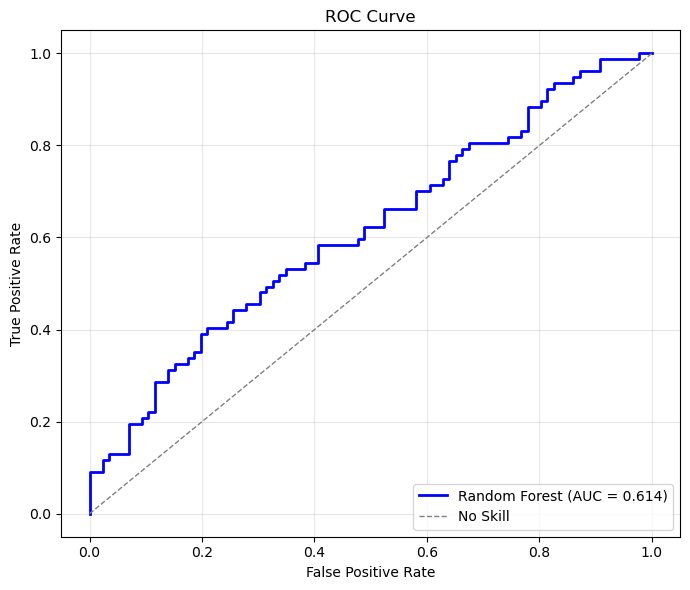

In [49]:
y_prob = rf_features.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.3f}")

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Training LightGBM

[[51 35]
 [30 47]]
              precision    recall  f1-score   support

        -1.0      0.630     0.593     0.611        86
         1.0      0.573     0.610     0.591        77

    accuracy                          0.601       163
   macro avg      0.601     0.602     0.601       163
weighted avg      0.603     0.601     0.602       163

AUC Score: 0.618


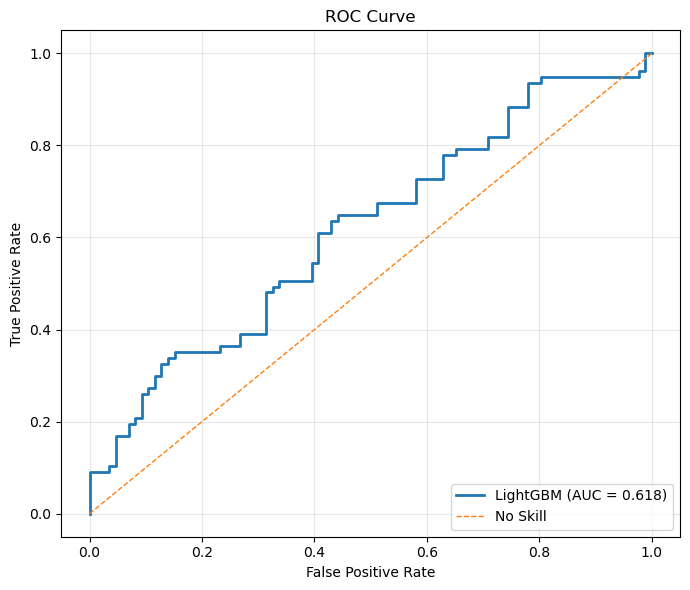

In [52]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


y_train_bin = (y_train == 1).astype(int)
y_test_bin  = (y_test  == 1).astype(int)


lgbm = LGBMClassifier(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight='balanced',
    objective='binary',
    random_state=42,
    n_jobs=-1,
    verbose=-1
)


lgbm.fit(X_train, y_train_bin)


y_proba = lgbm.predict_proba(X_test)[:, 1]
threshold = 0.4

y_pred = np.where(y_proba > threshold, 1, -1)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))


fpr, tpr, thresholds = roc_curve(y_test_bin, y_proba, pos_label=1)
roc_auc = auc(fpr, tpr)
print(f"AUC Score: {roc_auc:.3f}")


plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, lw=2, label=f'LightGBM (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], lw=1, linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [34]:
X_train.shape

(648, 20)

In [35]:
X_test.shape

(163, 20)